## Module assignment 6 
- INFO 3401 Fall 2020
- Topic: APIs and JSON
- 200 points

### Intro

Some sing about love, some sing about money. In this assignment, we will use the Spotify API to investigate who sings about what.

We will be using the Spotipy wrapper to access the API. Both the API and the wrapper illustrate a number of common patterns in working with APIs including: 

1. **Authentication.** _Getting set up with a service, and proving you are who you say you are_

2. **Pagination.** _Accessing data in chunks or pages_

3. **Python wrapper libraries.** _Using wrapper code to access API endpoints with Python objects_

4. **Nesting and linking.** _Working with nested and linked JSON objects that come back from an API_

It's very useful to be comfortable working with APIs in general. This module will give you practice with one specific API to help build up your capacity to work with other APIs in the future.

### Setup [20 points]

#### Step One: Registration
To do this assignment, you will need to get set up with the Spotify API. Here is a [link](https://developer.spotify.com/documentation/web-api/quick-start/) to the Spotify site to get started. Please follow the sections "Set Up Your Account" and "Register Your Application" to tell Spotify that you are a creating an application. **You should NOT setup a nodejs environment. Just follow the steps to create an account and register a sample application**. 

#### Step Two: Lookup
Once you are set up, you should be able to go to your Spotify ["Dashboard"](https://developer.spotify.com/dashboard/applications), click on your application and learn your `Client ID` and `Client Secret`. 

#### Step Three: Configuration
You should set up [environment variables](https://askubuntu.com/questions/58814/how-do-i-add-environment-variables) `CLIENT_ID` and `CLIENT_SECRET`. We covered how to do this in class on 11/16 so please consult the recording for extra help. You want to fill these variables with the Client ID and Client Secret from the Spotify dashboard.

#### Step Four: Installation
You should install spotipy in the same environment where you set your `CLIENT_ID` and `CLIENT_SECRET` variables using the command `$pip install spotipy --upgrade`.

#### Step Five: Verification
If you are correctly set up, you should be able to run the cell below without error to print out the albums from the English singer [Birdy](https://www.officialbirdy.com/). This is the example on the "Welcome to Spotipy" [documentation page](https://spotipy.readthedocs.io/en/2.16.1/). Often APIs give you a minimal example to help you get started.

### Run the following cell to show that you have setup Spotipy

In [3]:
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials

birdy_uri = 'spotify:artist:2WX2uTcsvV5OnS0inACecP'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

results = spotify.artist_albums(birdy_uri, album_type='album')

albums = results['items']
while results['next']:
    results = spotify.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

### Search for love song artists and save results [10 points]

- Use the `spotipy.search` [method](https://spotipy.readthedocs.io/en/2.16.1/#spotipy.client.Spotify.search) to search for songs that mention the word `love`.
- You will get back data that includes a `tracks` field with a list of `items` in it. Iterate over the items and fill a list of artists who sing love songs. Each artist should be a Python dictionary with two fields: `artist` and `artist_id`, representing an artist associated with some track returned from the search.
- Note that the artist field returned from calls to Spotify is a list of artists. You should make dictionary for _each_ artist in the list.
- Note that you should make 200 calls to the search method, using the `offset` parameter to get new pages and setting the `limit` field to 50. 
- There is some starter code to help you with all of this.

In [5]:
love_songs_artists = []

for offset in range(200):
    if offset % 10 == 0:
        print("iter=", offset)
    results = spotify.search(q='love', type='track', limit=50, offset=offset)
    # fill love_songs_artists with a list of dictionaries. Each dictionary should 
    # have two fields: artist and artist_id

### Check in

Run the cell below to turn your list of love songs into a dataframe. Do not modify the next cell.

In [6]:
### Do not modify this cell
love_songs_artists = pd.DataFrame(love_songs_artists)
print(len(love_songs_artists)) # include this line. Do not remove 
love_songs_artists

### Reflection question [20 points]

1. Why do you think Spotify's API returns a list of artists in the artist field, as opposed to a single artist?

Answer: 
    
2. Describe the `love_songs_artists` dataframe. What does it represent?

Answer: 

### Search for money song artists and save results [10 points]

- Use the `spotipy.search` [method](https://spotipy.readthedocs.io/en/2.16.1/#spotipy.client.Spotify.search) to search for songs that mention the word `money`.
- You should use the exact same process that you used above
- This time, fill a dictionary called `money_songs_artists`
- Note that you should make 200 calls to the API, using the `offset` parameter to get new pages and setting the `limit` field to 50. There is some starter code to help you.

In [7]:
money_songs_artists = []

for offset in range(200):
    if offset % 10 == 0:
        print("iter=", offset)
    results = spotify.search(q='money', type='track', limit=50, offset=offset)
    # Your code here
    
# Do not modify code below this line 
money_songs_artists = pd.DataFrame(money_songs_artists)
print(len(money_songs_artists)) 
money_songs_artists

### Merge [20 points]

Merge money songs and love songs to create a table `artists` showing every artist who is included in **both** `love_songs_artists` and `money_songs_artists`. Your table should have two columns, `artist` and `artist_id`. 

Depending on how you do this, you might need to rename columns, drop duplicates and reset indexes. You should end up with a table without duplicates listing every artist who is in both the `love_songs_artists` and `money_songs_artists` data frame. You should see around 25 unique artists.

In [8]:
artists = pd.DataFrame([], columns = ['artist','artist_id'])
artists

,artist,artist_id


### Examine the method below

Take a look at the method below. It returns a list of tracks for a given album. 

Go to this URL, which shows the songs from an album from Lil Tecca 
- https://open.spotify.com/album/389zGArsMlwuPorS4Cw7IX
    
Then call `get_tracks_from_album(389zGArsMlwuPorS4Cw7IX)`

What do you notice about the Spotify site and the API call? Why does that make sense? You don't need to type out an answer, just note what is going on.

In [6]:
def get_tracks_from_album(album_id):
    '''
    Don't change this code. The method is provided for you. You don't need to modify anything. 
    But you will need to understand this example to complete the other methods 
    '''
    tracks = []
    for track in spotify.album_tracks(album_id)['items']:
        tracks.append(track["name"])
    return tracks

get_tracks_from_album("389zGArsMlwuPorS4Cw7IX")[0:5]

['Our Time',
 'Actin Up',
 'When You Down (with Polo G feat. Lil Durk)',
 'Back It Up',
 'Chemistry']

### Get all albums [20 points]

Using the example above to give you a sense of the general pattern,  complete the `get_all_albums` method below. Your method should return a list of `id`s for every album for some artist, specified with their artist `artist_id`. 

For instance, if you call `get_all_albums(artist_id="0du5cEVh5yTK9QJze8zA0C")` you should get a list with the album ids for all albums and singles by Bruno Mars. You should be able to check results for any album by going to the ablum URL on Spotify. You will need to change albumID to a string like `1zHGyWFzo9Vav0UaT6ujds` to use the URL below.

. https://open.spotify.com/album/[albumID]

**Important.** Artists sometimes release singles as well as albums. Notice that you will have to call the `spotify.artist_albums` method twice (see code below) to get both the full-length albums and the singles for the artist.


In [7]:
def get_all_albums(artist_id, limit=50):
    '''Return a list of albums for the artist. You should return a set of IDs, one for each album'''
    results = spotify.artist_albums(artist_id, album_type='album', limit=limit)
    out = [] # use this to store output
    
    # your code here
    
    # You also need to call this again to get the artist's singles. 
    # notice that Album type is different in this second API call
    results = spotify.artist_albums(artist_id, album_type='single', limit=limit)

    # your code here
    
    return list(set(out))

get_all_albums(artist_id="0du5cEVh5yTK9QJze8zA0C") # all Bruno Mars albums

['1JirxaiYwz8hAxAk38rkeH',
 '3yt8Fkff5zoTNllx1J5ZKh',
 '4xWulj18AGahlyuZPulaGe',
 '3oP7uWUlDux6jlHTRlu0FC',
 '1z4Zl2hcCiRyB4uIPeqEfr',
 '0219JhsyibMkftKsI94Mv1',
 '4A0vJtV9ok7vmr9ursSKj8',
 '6cvRompQh4NtPhHa7cuAd2',
 '73pAZrAw8W3Ey9hBJYOVLt',
 '58ufpQsJ1DS5kq4hhzQDiI',
 '1uyf3l2d4XYwiEqAb7t7fX',
 '2vf1K6KumbRZnRHa1JeKyD',
 '4PgleR09JVnm3zY1fW3XBA',
 '6LD3J50OxLEQbAB8ahoj1S',
 '2xclonI4faQWl6lhqecGM5',
 '54DNHFsfCa7nlQFWXMg7y3',
 '1onK6XeDccA2NW6SlzQMNK',
 '4uoEruXjt0APvHaSqrwqPH',
 '7BzP09BlvvE4ioNgvdLrdm',
 '07OCQAUAQaZmKORKt2StFm',
 '4w6KUt7eyD4paTTNctylCS',
 '3X801hUAmbUAHmatvmMhfA',
 '0yDiMZdbFwO5lGB9Dq5wlL',
 '3mumK2ar9b4JPhVOZR0V2p',
 '5a4sJJ3qjn6hqRsvm0Veso',
 '7yBnuW3SpMKy3EB9iU0C7p',
 '3z0q0X2akvNg4SP1n1jYfK',
 '5AVEtKtguEa8sqYhSj3zFW',
 '6J84szYCnMfzEcvIcfWMFL',
 '7KBjLhk3IM27k3ry4vBk3i',
 '5EA4kogB3cZr2qykFlZDYV',
 '7mkyc2BUahNfo0orKzqNGB']

### Get all tracks from all albums [25 points]

Finally, use the `get_all_albums` method and the `get_tracks_from_album` method to get a list of all tracks from each artist. There is some starter code to help you. You should return a set of all tracks from all albums for an artist (including singles).

In [8]:
def get_all_tracks_for_artist(artist_id):
    albums = get_all_albums(artist_id=artist_id)
    all_tracks = []

    # your code here

    return list(set(all_tracks))

RIHANNA_ARTIST_ID = "5pKCCKE2ajJHZ9KAiaK11H"
all_songs_by_rihanna = get_all_tracks_for_artist(artist_id=RIHANNA_ARTIST_ID)
all_songs_by_rihanna[0:5]

['Stupid In Love - Chew Fu Small Room Fix',
 'What Now - Guy Scheiman Dub',
 'S&M - Sidney Samson Club',
 "Breakin' Dishes - Soul Seekerz Remix",
 'California King Bed - DJ Chus & Abel Ramos Radio']

### Get all tracks [10 points]

Use your `get_all_tracks_for_artist` method to help you fill a dataframe called `all_tracks` of all the tracks from each artist in the `artists` table.  There is some starter code to help you. Your `all_tracks` dataframe should have two fields, "artist_id" and "track_name" to represent each track from each artist. Be sure to remove duplicates.

In [11]:
all_tracks_list = []

all_tracks = pd.DataFrame([], columns = ["artist_id", "track_name"])

for artist_no, artist_id in enumerate(artists["artist_id"]):
    pass
        
# fill the dataframe all_tracks

all_tracks

,artist_id,track_name


### Aggregation [20 points]

Use `all_tracks` to create a data frame called `count_tracks_df` with three colums: `artist_id`, `artist` and `total_songs`. The `total_songs` field should store the total count of tracks for the artist. The `artist_id` and `artist` fields should store the id and name of the artist. For instance, your table should have a `total_songs` field showing the total number of tracks for the artist Lana Del Rey (ID=`00FQb4jTyendYWaN8pK0wa`).

In [13]:
count_tracks_df = pd.DataFrame([], columns = ["artist_id", "total_songs", "artist"])

count_tracks_df

,artist_id,total_songs,artist


In [14]:
# Do not modify this cell. It should show the count of tracks by Lana Del Rey

count_tracks_df[count_tracks_df["artist"] == "Lana Del Rey"]

,artist_id,total_songs,artist


### Data analysis [20 points]

**High level task.** 

Fill a data frame `love_and_money` which has three columns: `Nlove`, `Nmoney` and `artist_id`. `Nlove` and `Nmoney` should represent the number of tracks containing the string `love` (ignore case) and the number of tracks containing the string `money` (ignore case) respectively, for a given artist. For instance, if Lana Del Ray has 3 songs which include the string `love` the value of `Nlove` should be 3, for the row in the dataframe representing Lana Del Ray. There is a line of code below to show you the structure of the data frame.

**Level-level instructions.**

It's up to you to figure out how to create `love_and_money`. (There are multiple ways to do it). Here are a few hints; you don't have to use them.
- You could create a new column "love" in the `all_tracks` dataframe which stores a 1 if the track title contains the word love. Then you could create a new column "money" in the `all_tracks` dataframe which stores a 1 if the track title contains the word money. You might want to use [str.contains](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html) to create these columns.
- You could then select rows from `all_tracks` and group by artist_id to count how many times an artist sings about love and how many times an artist sings about money. You might want to use [value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) for this.


In [15]:
love_and_money = pd.DataFrame([], columns=['artist_id', 'Nlove', 'Nmoney'])

# Your code here

love_and_money

,artist_id,Nlove,Nmoney


In [16]:
### Create a results table that has five fields [artist_id, total_songs, artist, Nlove, Nmoney]

# The easiest way to do this is to merge the count_tracks_df table with the love_and_money table

results = pd.DataFrame([], columns=['artist_id', 'Nlove', 'Nmoney', 'total_songs', 'artist'])

results

,artist_id,Nlove,Nmoney,total_songs,artist


In [17]:
# Add two columns to the results table, love_pct and money_pct, showing what percentage of the
# time an artist sings about love and the percentage of the time an artist sings about money. 
# To make each field, you will have to divide Nlove and Nmoney by the total_songs and 
# multiply by 100 (remember that percentages are fractions out of 100)

results["money_pct"] = "TODO"   # your code here
results["love_pct"] = "TODO" 

results

,artist_id,Nlove,Nmoney,total_songs,artist,money_pct,love_pct


### Plotting [15 points]

- Make a scatter plot showing the percentage of an artist's songs which mention love along the y-axis and the percentage of an artist's songs which mention money along the x-axis.
- Each point on the plot should represent one artist.
- Most of the code is provided for you. You need to fill the `X`, `Y` and `labels` variables to get it to run. The label variable is a list of labels for each point on the scatter plot.
- If are confused what the code is doing, please consult this [stackoverflow post](https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point) and the [matplotlib documentation](https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/annotation_demo.html).
- **Once you are finished with the plot, be sure to answer the final question below**

In [18]:
# You need to modify this cell to fill the X, Y and labels variables

X = []
Y = []
labels = []


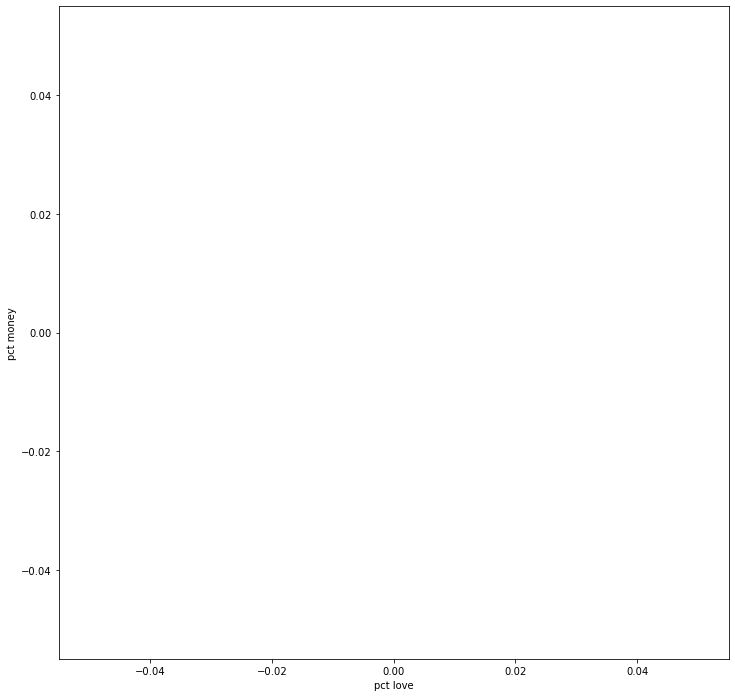

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X, Y)

for i, txt in enumerate(labels):
    ax.annotate(txt, (X[i], Y[i]))
    
ax.set_xlabel('pct love')
ax.set_ylabel('pct money')
fig.set_size_inches(12, 12)  # If you want, you can make the plot even larger to make the points easier to see.

### Questions [10 points]

- Which artists tend to sing the most about money? Does this surprise you?

[Your answer here]

- Which artists tend to sing the most about love?  Does this surprise you?

[Your answer here]

### Extra credit [up to 25 points]

Modify this running example to keep track of the genre or gender of each artist (or anything else you are curious about). Redo the scatter plot and color points based on genre or gender or some other variable. Do you see anything interesting? You might want to look at a larger number of artists by looking at more pages while searching for love and money at the top of the notebook (using the Spotify API).

### Include all extra credit code below this line